In [3]:
from qnet_context import qnetvo as qnet
from mac_context import multiple_access_channels as mac
import matplotlib.pyplot as plt

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [22]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, mac_reg):

    inequality_opt_dicts = []

    for i in range(7):
        inequality_tag = "I_" + str(i) + "_"
        
        regex = mac_reg + inequality_tag + r".*"    
        files = get_data_files(path, regex)
        inequality_opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return inequality_opt_dicts

## Mac Data Analysis

In [33]:
data_path = "../data/33-22-2_multiaccess_twotrit_simulations/"

qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^qmac_")
eatx_mac_opt_dicts = get_inequality_opt_dicts(data_path, r"^eatx_mac_")
eatx_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^eatx_qmac_")
ghza_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_cmac_")
ghza_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_qmac_")

gea_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^gea_cmac_")
gea_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^gea_qmac_")


# ghza_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_qmac_")
# ea3_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ea3_cmac_")
# ea3_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ea3_qmac_")
# ea_txrx_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ea_txrx_cmac_")
# ghza_cmac_no_locc_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_cmac_no_locc_")

## Analyzing Data

In [34]:
multiaccess_twotrit_witnesses = mac.multiaccess_twotrit_witnesses()


def analyze_data(game_opt_dicts, inequalities):
    max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(game_opt_dicts)):
        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        if len(opt_dicts) > 0:

            cbound = inequality[0]
            cbounds += [cbound]

            qbound = 0.0
            for x in range(9):
                qbound += max(inequality[1][:,x])
            qbounds += [qbound]
        
            max_violations += [(max([max(opt_dict["scores"]) for opt_dict in opt_dicts]) - cbound) / (qbound - cbound)] 

        

    return max_violations, qbounds, cbounds

print(len(gea_cmac_opt_dicts))

qmac_max_violations, qbounds, cbounds = analyze_data(qmac_opt_dicts, multiaccess_twotrit_witnesses)
eatx_mac_max_violations, qbounds, cbounds = analyze_data(eatx_mac_opt_dicts, multiaccess_twotrit_witnesses)
eatx_qmac_max_violations, qbounds, cbounds = analyze_data(eatx_qmac_opt_dicts, multiaccess_twotrit_witnesses)
ghza_cmac_max_violations, qbounds, cbounds = analyze_data(ghza_cmac_opt_dicts, multiaccess_twotrit_witnesses)
ghza_qmac_max_violations, qbounds, cbounds = analyze_data(ghza_qmac_opt_dicts, multiaccess_twotrit_witnesses)

gea_cmac_max_violations, qbounds, cbounds = analyze_data(gea_cmac_opt_dicts, multiaccess_twotrit_witnesses)
gea_qmac_max_violations, qbounds, cbounds = analyze_data(gea_qmac_opt_dicts, multiaccess_twotrit_witnesses)



7


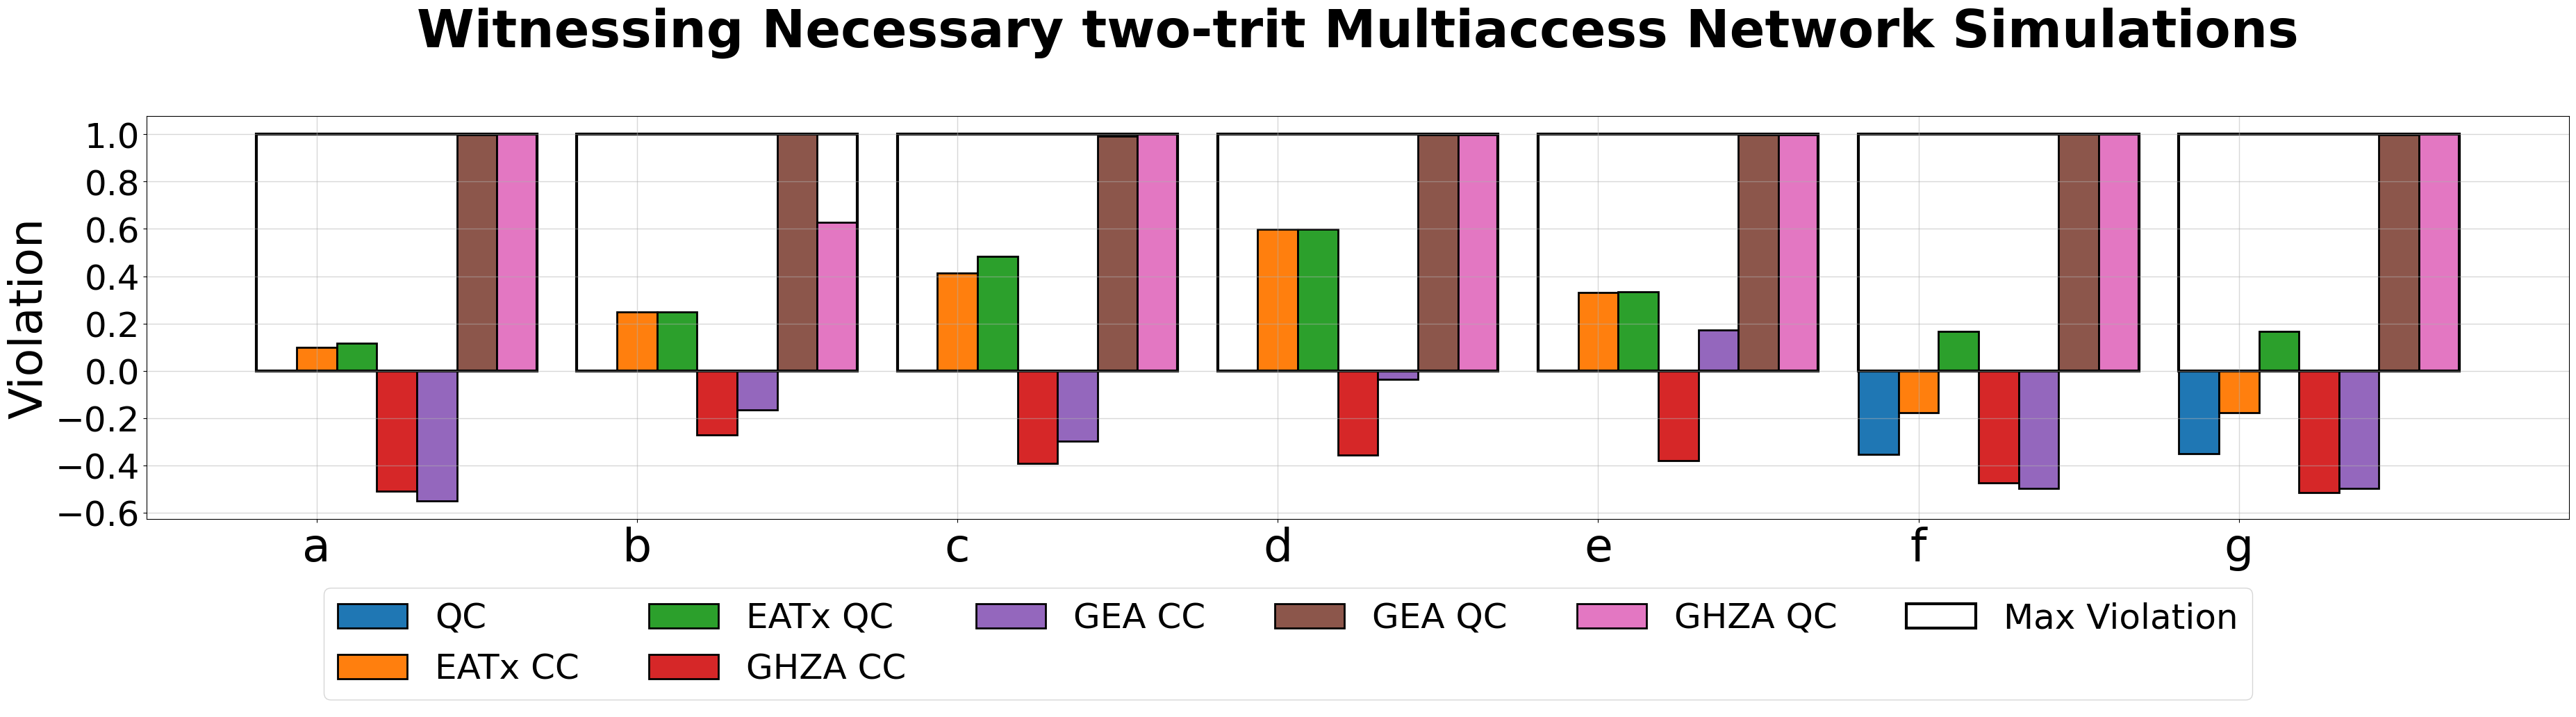

In [40]:
x_labels = ["a","b","c","d","e","f","g"]

x_axis = np.arange(7)

width = 1/8

fig = plt.figure(figsize=(45, 10))
plt.grid(linewidth=1, alpha=0.5)


plt.bar(x_axis-1*width, qmac_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
plt.bar(x_axis-0*width, eatx_mac_max_violations, width=width, label="EATx CC", edgecolor="black", linewidth=2)
plt.bar(x_axis+1*width, eatx_qmac_max_violations, width=width, label="EATx QC", edgecolor="black", linewidth=2)
plt.bar(x_axis+2*width, ghza_cmac_max_violations, width=width, label="GHZA CC", edgecolor="black", linewidth=2)
plt.bar(x_axis+3*width, gea_cmac_max_violations, width=width, label="GEA CC", edgecolor="black", linewidth=2)
plt.bar(x_axis+4*width, gea_qmac_max_violations, width=width, label="GEA QC", edgecolor="black", linewidth=2)
plt.bar(x_axis+5*width, ghza_qmac_max_violations, width=width, label="GHZA QC", edgecolor="black", linewidth=2)





# plt.bar(x_axis+1*width, quantum_bounds(), width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)
plt.bar(x_axis+2*width, np.ones(7), width=1-width,  label="Max Violation", edgecolor="black", linewidth=3, fill=False)





plt.xticks(x_axis, x_labels, fontsize=48)
plt.title("Witnessing Necessary two-trit Multiaccess Network Simulations\n", size=54, fontweight="bold")
plt.yticks(fontsize=36)
plt.ylabel("Violation", fontsize=48)
# plt.legend(fontsize=20, ncol=3)

plt.figlegend(loc="lower center", ncols = 6, fontsize=36)
plt.subplots_adjust(bottom=0.3)

plt.show()